<a href="https://colab.research.google.com/github/verneh/datasci/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install torch==1.4.0
!pip install torchvision==0.5.0

     |████████████████████████████████| 753.4MB 14kB/s 
ERROR: torchvision 0.6.0+cu101 has requirement torch==1.5.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
     |████████████████████████████████| 4.0MB 15.3MB/s 
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
from fastai import *
from fastai.vision.data import *


import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# this leads us to colab notebooks.
import os
os.chdir("drive/My Drive/Colab Notebooks")
os.listdir()

['Visitors.csv',
 'Contacts.csv',
 'my_module.py',
 'DL1.ipynb',
 'kaggle.json',
 'database.sqlite',
 'Tweets.csv',
 'Segment Characteristics-4 segments-SUPER FINAL.ipynb',
 'Thumbtack.ipynb',
 'Yo.ipynb',
 'Coursera.ipynb',
 'SE.ipynb',
 'Max_Num.ipynb',
 'random_split_churn.pickle',
 'churn',
 'smote.pickle',
 'churn.pickle',
 'rfc_model.pkl',
 'marketing.ipynb',
 'quiz.ipynb',
 'ULMFit.ipynb',
 'dna',
 'edx',
 'mnist_with_keras_verne.ipynb',
 'Copy of mnist_with_keras_verne.ipynb',
 'Tensorflow.ipynb',
 'img.ipynb',
 'data',
 '2.ipynb']

In [0]:
classes = ['contaminated','uncontaminated']

In [0]:
folder = 'contaminated'
file = 'contaminated.txt'

In [0]:
from fastai.imports import *

path = Path('data/seas')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('data/seas/contaminated'),
 PosixPath('data/seas/uncontaminated.txt'),
 PosixPath('data/seas/uncontaminated.csv'),
 PosixPath('data/seas/contaminated.txt'),
 PosixPath('data/seas/contaminated.csv'),
 PosixPath('data/seas/uncontaminated')]

In [0]:
from fastai.vision.data import *

download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'uncontaminated'
file = 'uncontaminated.txt'

In [0]:
path = Path('data/seas')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('data/seas/contaminated'),
 PosixPath('data/seas/uncontaminated.txt'),
 PosixPath('data/seas/uncontaminated.csv'),
 PosixPath('data/seas/contaminated.txt'),
 PosixPath('data/seas/contaminated.csv'),
 PosixPath('data/seas/uncontaminated')]

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

contaminated


uncontaminated


In [0]:
from fastai.vision import *

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [0]:
data.classes

['contaminated', 'uncontaminated']

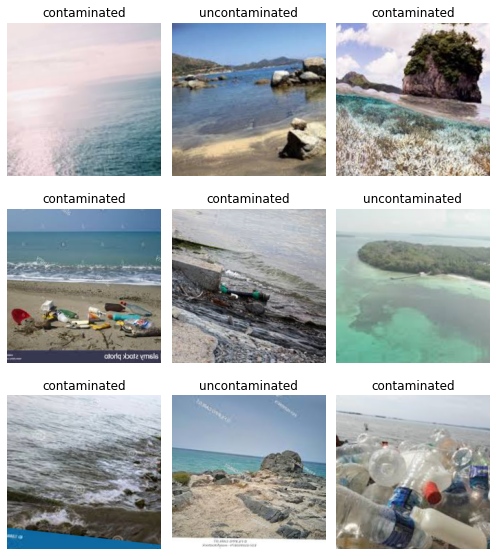

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.386126,1.365698,0.437500,00:03
1,1.215765,1.249601,0.343750,00:02
2,1.018864,1.161833,0.343750,00:02
3,0.870055,1.130263,0.343750,00:02


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


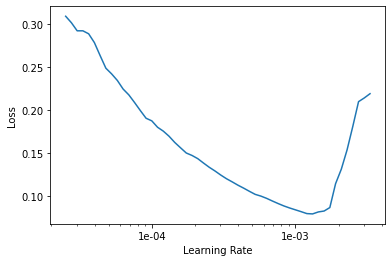

In [0]:
learn.recorder.plot()

In [0]:
# could use 3e-5,3e-4 instead. 1e-4,1e-3
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.000716,1.107122,0.388889,00:34
1,0.000569,1.128404,0.375000,00:33


In [0]:
learn.save('stage-2')

**Interpretation**

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

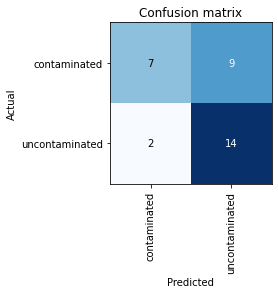

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=100)

In [0]:
# confirm images through GUI whether to delete or change its classification.
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [0]:
# time to learn
ds, idxs = DatasetFormatter().from_similars(learn)

Getting activations...


Computing similarities...


**Production Time**

In [0]:
import fastai


In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

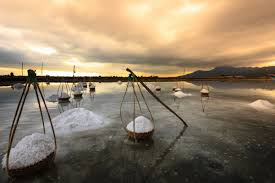

In [0]:
img = open_image(path/'contaminated'/'00000078.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category contaminated

Train learning rate and number of epochs is pretty much what you can do.



**High Learning Rate**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,2.083679,16688028.000000,0.500000,00:02


**Low Learning Rate**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.196824,1.398080,0.500000,00:02
1,1.143424,1.116085,0.468750,00:02
2,1.170734,1.027811,0.437500,00:02
3,1.152970,0.981629,0.375000,00:02
4,1.171751,0.998598,0.375000,00:02


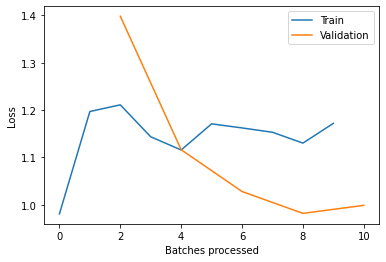

In [0]:
learn.recorder.plot_losses()

**Too Few Epochs**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.486157,27.346609,0.500000,00:02


**Too Many Epochs**

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=16, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.784890,0.863908,0.472222,00:33
1,0.787077,0.889933,0.458333,00:34
2,0.772977,0.922415,0.472222,00:34
3,0.778000,0.932294,0.506944,00:34
4,0.763423,0.924597,0.486111,00:33
5,0.691279,0.909677,0.486111,00:33
6,0.631641,0.902513,0.472222,00:33
7,0.573541,0.898867,0.493056,00:33
8,0.516339,0.893306,0.458333,00:33
9,0.465976,0.887284,0.444444,00:33
